# Exploratory Data Analysis

**Purposes:**
- Hiểu cấu trúc và đặc điểm của dataset
- Xác định các vấn đề về chất lượng dữ liệu (giá trị thiếu, ngoại lai, không nhất quán)
- Khám phá các mẫu hình và mối quan hệ giữa các đặc trưng
- Hướng dẫn chiến lược tiền xử lý và feature engineering

## 1. Import Required Libraries

In [130]:
# Thư viện xử lý và phân tích dữ liệu
import pandas as pd
import numpy as np

# Thư viện trực quan hóa
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Tắt cảnh báo
import warnings
warnings.filterwarnings('ignore')

# Cài đặt hiển thị
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Cài đặt style cho visualization
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Đã import thành công tất cả thư viện!")

✓ Đã import thành công tất cả thư viện!


## 2. Load the Dataset

Tải dataset sử dụng pandas và hiển thị các hàng đầu tiên để hiểu cấu trúc dữ liệu ban đầu.

In [131]:
# Cell: Load Dataset - Sửa đường dẫn file
file_path = r"C:\Users\quynh\Downloads\CS211_Health_Law_Web\dataset\QAPairsDone_405.csv"

try:
    df = pd.read_csv(file_path, encoding='utf-8')  # Thêm encoding cho tiếng Việt
    print(f"✓ Đã tải dataset thành công!")
    print(f"Kích thước dataset: {df.shape[0]} hàng × {df.shape[1]} cột\n")
except FileNotFoundError:
    print("⚠ Không tìm thấy file. Vui lòng kiểm tra đường dẫn.")
    df = pd.DataFrame()
except Exception as e:
    print(f"⚠ Lỗi khi đọc file: {e}")
    df = pd.DataFrame()

✓ Đã tải dataset thành công!
Kích thước dataset: 405 hàng × 3 cột



In [132]:
# Hiển thị 5 hàng đầu tiên
print("5 hàng đầu tiên của dataset:")
df.head()

5 hàng đầu tiên của dataset:


,Main_Topic,Câu hỏi,Trả lời
0,NHỮNG VẤN ĐỀ CHUNG,Bảo hiểm y tế là gì?,Bảo hiểm y tế là hình thức bảo hiểm được áp dụ...
1,NHỮNG VẤN ĐỀ CHUNG,Bảo hiểm y tế được thực hiện dựa trên nguyên t...,Bảo hiểm y tế được thực hiện theo 5 nguyên tắc...
2,NHỮNG VẤN ĐỀ CHUNG,Luật BHYT được áp dụng đối với đối tượng nào?,"Luật BHYT áp dụng đối với tổ chức, cá nhân tro..."
3,NHỮNG VẤN ĐỀ CHUNG,Hiện nay có mấy loại hình bảo hiểm y tế đang đ...,Từ nay đến hết 31/12/2013 các đối tượng khi ch...
4,NHỮNG VẤN ĐỀ CHUNG,Nhà nước có chính sách gì đối với bảo hiểm y tế?,Chính sách của Nhà nước đối với BHYT bao gồm (...


In [133]:
# Hiển thị 5 hàng cuối cùng
print("5 hàng cuối cùng của dataset:")
df.tail()

5 hàng cuối cùng của dataset:


,Main_Topic,Câu hỏi,Trả lời
400,"THỦ TỤC CẤP PHÉP HÓA CHẤT, CHẾ PHẨM DIỆT CÔN T...",Điều kiện đối với chế phẩm đăng ký lưu hành,"1. Độc tính của chế phẩm không thuộc nhóm Ia, ..."
401,"THỦ TỤC CẤP PHÉP HÓA CHẤT, CHẾ PHẨM DIỆT CÔN T...",Cơ sở được đứng tên đăng ký lưu hành mới chế p...,"a) Doanh nghiệp, hợp tác xã, hộ kinh doanh tro..."
402,"THỦ TỤC CẤP PHÉP HÓA CHẤT, CHẾ PHẨM DIỆT CÔN T...",Hình thức Đăng ký lưu hành mới áp dụng đối với...,a) Chế phẩm mới được sản xuất trong nước trừ c...
403,"THỦ TỤC CẤP PHÉP HÓA CHẤT, CHẾ PHẨM DIỆT CÔN T...",Đăng ký lưu hành bổ sung áp dụng đối với trườn...,a) Thay đổi quyền sở hữu số đăng ký lưu hành;\...
404,"THỦ TỤC CẤP PHÉP HÓA CHẤT, CHẾ PHẨM DIỆT CÔN T...",Tên thương mại của chế phẩm được quy định thế ...,1. Mỗi chế phẩm của một nhà sản xuất chỉ được ...


In [134]:
# Hiển thị mẫu ngẫu nhiên
print("Mẫu ngẫu nhiên 10 hàng:")
df.sample(min(10, len(df)))

Mẫu ngẫu nhiên 10 hàng:


,Main_Topic,Câu hỏi,Trả lời
195,"CẤP GIẤY CHỨNG NHẬN BÀI THUỐC GIA TRUYỀN, PHƯƠ...",NaN,"Căn cứ khoản 9 điều 2 Luật Khám bệnh, Chữa bện..."
81,"QUẢN LÝ, SỬ DỤNG QUỸ BẢO HIỂM Y TẾ",Quỹ KCB do BHXH tỉnh quản lý trong năm không s...,Quỹ KCB do BHXH tỉnh quản lý 60% trong năm khô...
307,"THỦ TỤC CẤP PHÉP HÓA CHẤT, CHẾ PHẨM DIỆT CÔN T...",NaN,"Các chế phẩm diệt côn trùng, diệt khuẩn dùng t..."
34,THẺ BẢO HIỂM Y TẾ,Thẻ BHYT có thời hạn sử dụng như thế nào ?,Thẻ BHYT có giá trị sử dụng như sau (Khoản 3 Đ...
362,THỦ TỤC HÀNH CHÍNH LĨNH VỰC THỤ TINH ỐNG NGHIỆ...,Nếu hồ sơ đề nghị công nhận cơ sở đủ điều kiện...,Trong vòng 15 ngày làm việc sau khi nhận được ...
129,THỦ TỤC HÀNH CHÍNH LĨNH VỰC QUẢN LÝ THỰC PHẨM ...,NaN,1. Khi doanh nghiệp nộp phí bằng hình thức Key...
151,THỦ TỤC HÀNH CHÍNH LĨNH VỰC CẤP CHỨNG CHỈ HÀNH...,NaN,"Điều 22 Luật Khám bệnh, chữa bệnh quy định: Vi..."
241,"THỦ TỤC HÀNH CHÍNH LĨNH VỰC ĐÀO TẠO, NGHIÊN CỨ...",NaN,"Trong quy định tại Khoản 2 Điều 10, điểm e Kho..."
293,"THỦ TỤC XÉT TẶNG THẦY THUỐC NHÂN DÂN, THẦY THU...",NaN,Đối với thầy thuốc đã nghỉ hưu trên 03 năm có ...
341,THỦ TỤC HÀNH CHÍNH LĨNH VỰC MỸ PHẨM,NaN,- Theo Hiệp định mỹ phẩm ASEAN và Thông tư số ...


## 3. Dataset Overview and Basic Information


In [135]:
# Kích thước dataset
print("=" * 60)
print("KÍCH THƯỚC DATASET")
print("=" * 60)
print(f"Số hàng: {df.shape[0]:,}")
print(f"Số cột: {df.shape[1]}")
print(f"Tổng số ô: {df.shape[0] * df.shape[1]:,}")

KÍCH THƯỚC DATASET
Số hàng: 405
Số cột: 3
Tổng số ô: 1,215


In [136]:
# Tên các cột
print("\n" + "=" * 60)
print("TÊN CÁC CỘT")
print("=" * 60)
for idx, col in enumerate(df.columns, 1):
    print(f"{idx:2d}. {col}")


TÊN CÁC CỘT
 1. Main_Topic
 2. Câu hỏi
 3. Trả lời


In [137]:
# Kiểu dữ liệu
print("\n" + "=" * 60)
print("PHÂN PHỐI KIỂU DỮ LIỆU")
print("=" * 60)
print(df.dtypes.value_counts())
print("\nKiểu dữ liệu chi tiết:")
print(df.dtypes)


PHÂN PHỐI KIỂU DỮ LIỆU
object    3
Name: count, dtype: int64

Kiểu dữ liệu chi tiết:
Main_Topic    object
Câu hỏi       object
Trả lời       object
dtype: object


In [138]:
# Thông tin cơ bản
print("\n" + "=" * 60)
print("THÔNG TIN DATASET")
print("=" * 60)
df.info(verbose=True, show_counts=True)


THÔNG TIN DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Main_Topic  405 non-null    object
 1   Câu hỏi     275 non-null    object
 2   Trả lời     405 non-null    object
dtypes: object(3)
memory usage: 9.6+ KB


In [139]:
# Những chỗ có NaN
print("\n" + "=" * 60)
print("Giá trị NaN")
print("=" * 60)
nan_info = df.isna().sum()
for col, count in nan_info.items():
    if count > 0:
        print(f"{col}: {count} NaN")
        print(df[df[col].isna()].head())


Giá trị NaN
Câu hỏi: 130 NaN
                                      Main_Topic Câu hỏi  \
107    THỦ TỤC HÀNH CHÍNH LĨNH VỰC BẢO HIỂM Y TẾ     NaN   
109    THỦ TỤC HÀNH CHÍNH LĨNH VỰC BẢO HIỂM Y TẾ     NaN   
111    THỦ TỤC HÀNH CHÍNH LĨNH VỰC BẢO HIỂM Y TẾ     NaN   
113  THỦ TỤC HÀNH CHÍNH LĨNH VỰC HỢP TÁC QUỐC TẾ     NaN   
115  THỦ TỤC HÀNH CHÍNH LĨNH VỰC HỢP TÁC QUỐC TẾ     NaN   

                                               Trả lời  
107  Trường hợp một người đồng thời thuộc nhiều đối...  
109  Mức đóng BHYT hằng tháng của các đối tượng đượ...  
111  Mức đóng bằng 4,5% mức lương cơ sở đối với Thâ...  
113  Ngày 29/3/2013 Bộ Y tế đã ban hành Thông tư số...  
115  Hồ sơ xin phép tổ chức Hội nghị/Hội thảo quốc ...  


In [140]:
# Xóa các hàng có ít nhất một NaN
before = len(df)
df = df.dropna(how='any').reset_index(drop=True)
print(f"Đã xóa {before - len(df)} hàng (còn {len(df)}).")

# Kiểm tra lại không còn NaN
print("Tổng NaN còn lại:", df.isna().sum().sum())

Đã xóa 130 hàng (còn 275).
Tổng NaN còn lại: 0


In [141]:
# Phân loại các cột
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print("\n" + "=" * 60)
print("PHÂN LOẠI ĐẶC TRƯNG")
print("=" * 60)
print(f"Đặc trưng số ({len(numerical_cols)}): {numerical_cols}")
print(f"\nĐặc trưng phân loại ({len(categorical_cols)}): {categorical_cols}")
print(f"\nĐặc trưng DateTime ({len(datetime_cols)}): {datetime_cols}")


PHÂN LOẠI ĐẶC TRƯNG
Đặc trưng số (0): []

Đặc trưng phân loại (3): ['Main_Topic', 'Câu hỏi', 'Trả lời']

Đặc trưng DateTime (0): []


## 4. Statistical Summary

Tạo tóm tắt thống kê toàn diện cho các đặc trưng số và phân loại, bao gồm mean, median, độ lệch chuẩn và quantiles.

In [142]:
# Tóm tắt thống kê cho đặc trưng số
print("=" * 60)
print("ĐẶC TRƯNG SỐ - TÓM TẮT THỐNG KÊ")
print("=" * 60)
if len(numerical_cols) > 0:
    display(df[numerical_cols].describe().T)
else:
    print("Không tìm thấy đặc trưng số.")

ĐẶC TRƯNG SỐ - TÓM TẮT THỐNG KÊ
Không tìm thấy đặc trưng số.


In [143]:
# Thống kê mở rộng
if len(numerical_cols) > 0:
    print("\n" + "=" * 60)
    print("THỐNG KÊ MỞ RỘNG")
    print("=" * 60)
    
    extended_stats = pd.DataFrame({
        'count': df[numerical_cols].count(),
        'mean': df[numerical_cols].mean(),
        'median': df[numerical_cols].median(),
        'mode': df[numerical_cols].mode().iloc[0] if len(df) > 0 else np.nan,
        'std': df[numerical_cols].std(),
        'var': df[numerical_cols].var(),
        'skewness': df[numerical_cols].skew(),
        'kurtosis': df[numerical_cols].kurtosis(),
        'min': df[numerical_cols].min(),
        'max': df[numerical_cols].max(),
        'range': df[numerical_cols].max() - df[numerical_cols].min(),
        'IQR': df[numerical_cols].quantile(0.75) - df[numerical_cols].quantile(0.25)
    })
    
    display(extended_stats)

In [144]:
# Tóm tắt thống kê cho đặc trưng phân loại
print("\n" + "=" * 60)
print("ĐẶC TRƯNG PHÂN LOẠI - TÓM TẮT THỐNG KÊ")
print("=" * 60)
if len(categorical_cols) > 0:
    cat_summary = pd.DataFrame({
        'count': df[categorical_cols].count(),
        'unique': df[categorical_cols].nunique(),
        'top': df[categorical_cols].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan),
        'freq': df[categorical_cols].apply(lambda x: x.value_counts().iloc[0] if len(x.value_counts()) > 0 else 0),
        'missing': df[categorical_cols].isnull().sum(),
        'missing_%': (df[categorical_cols].isnull().sum() / len(df) * 100).round(2)
    })
    display(cat_summary)
else:
    print("Không tìm thấy đặc trưng phân loại.")


ĐẶC TRƯNG PHÂN LOẠI - TÓM TẮT THỐNG KÊ


,count,unique,top,freq,missing,missing_%
Main_Topic,275,33,"TỔ CHỨC KHÁM BỆNH, CHỮA BỆNH BẢO HIỂM Y TẾ VÀ ...",22,0,0.000
Câu hỏi,275,273,Bảo hiểm y tế là gì?,2,0,0.000
Trả lời,275,274,12 Tháng,2,0,0.000


## 5. Missing Values Analysis

Xác định và trực quan hóa giá trị thiếu sử dụng heatmap và biểu đồ cột. Tính phần trăm dữ liệu thiếu cho mỗi cột.

In [145]:
# Tính toán giá trị thiếu
print("=" * 60)
print("PHÂN TÍCH GIÁ TRỊ THIẾU")
print("=" * 60)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2),
    'Data_Type': df.dtypes.values
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_data) > 0:
    display(missing_data)
    print(f"\nTổng số cột có giá trị thiếu: {len(missing_data)}")
    print(f"Tổng số ô thiếu: {df.isnull().sum().sum():,}")
    print(f"Phần trăm dữ liệu thiếu: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")
else:
    print("✓ Không có giá trị thiếu trong dataset!")

PHÂN TÍCH GIÁ TRỊ THIẾU
✓ Không có giá trị thiếu trong dataset!


In [146]:
# Trực quan hóa giá trị thiếu - Biểu đồ cột
if len(missing_data) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Biểu đồ phần trăm
    missing_data.sort_values('Missing_Percentage', ascending=True).plot(
        x='Column', 
        y='Missing_Percentage', 
        kind='barh', 
        ax=axes[0],
        color='coral',
        legend=False
    )
    axes[0].set_title('Giá Trị Thiếu Theo Đặc Trưng (%)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Phần Trăm Thiếu (%)', fontsize=12)
    axes[0].set_ylabel('Đặc Trưng', fontsize=12)
    
    # Số lượng thiếu
    missing_data.sort_values('Missing_Count', ascending=True).plot(
        x='Column', 
        y='Missing_Count', 
        kind='barh', 
        ax=axes[1],
        color='skyblue',
        legend=False
    )
    axes[1].set_title('Giá Trị Thiếu Theo Đặc Trưng (Số Lượng)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Số Lượng Thiếu', fontsize=12)
    axes[1].set_ylabel('Đặc Trưng', fontsize=12)
    
    plt.tight_layout()
    plt.show()

In [147]:
# Heatmap giá trị thiếu
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(14, 8))
    sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
    plt.title('Heatmap Giá Trị Thiếu', fontsize=16, fontweight='bold')
    plt.xlabel('Đặc Trưng', fontsize=12)
    plt.ylabel('Hàng', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("Không có giá trị thiếu để trực quan hóa.")

Không có giá trị thiếu để trực quan hóa.


In [148]:
# Tương quan giá trị thiếu
if df.isnull().sum().sum() > 0:
    missing_corr = df.isnull().corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(missing_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Tương Quan Giá Trị Thiếu Giữa Các Đặc Trưng', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 6. Data Types and Memory Usage

Phân tích kiểu dữ liệu của mỗi cột và sử dụng bộ nhớ để xác định cơ hội tối ưu hóa tiềm năng.

In [149]:
# Phân tích sử dụng bộ nhớ
print("=" * 60)
print("PHÂN TÍCH SỬ DỤNG BỘ NHỚ")
print("=" * 60)

memory_usage = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes.values,
    'Memory_Usage_MB': df.memory_usage(deep=True).values[1:] / 1024**2,
    'Non_Null_Count': df.count().values
})

memory_usage['Memory_Percentage'] = (memory_usage['Memory_Usage_MB'] / memory_usage['Memory_Usage_MB'].sum() * 100).round(2)
memory_usage = memory_usage.sort_values('Memory_Usage_MB', ascending=False)

display(memory_usage)

print(f"\nTổng bộ nhớ sử dụng: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

PHÂN TÍCH SỬ DỤNG BỘ NHỚ


,Column,Data_Type,Memory_Usage_MB,Non_Null_Count,Memory_Percentage
2,Trả lời,object,0.423,275,72.040
1,Câu hỏi,object,0.094,275,16.050
0,Main_Topic,object,0.070,275,11.910



Tổng bộ nhớ sử dụng: 0.59 MB


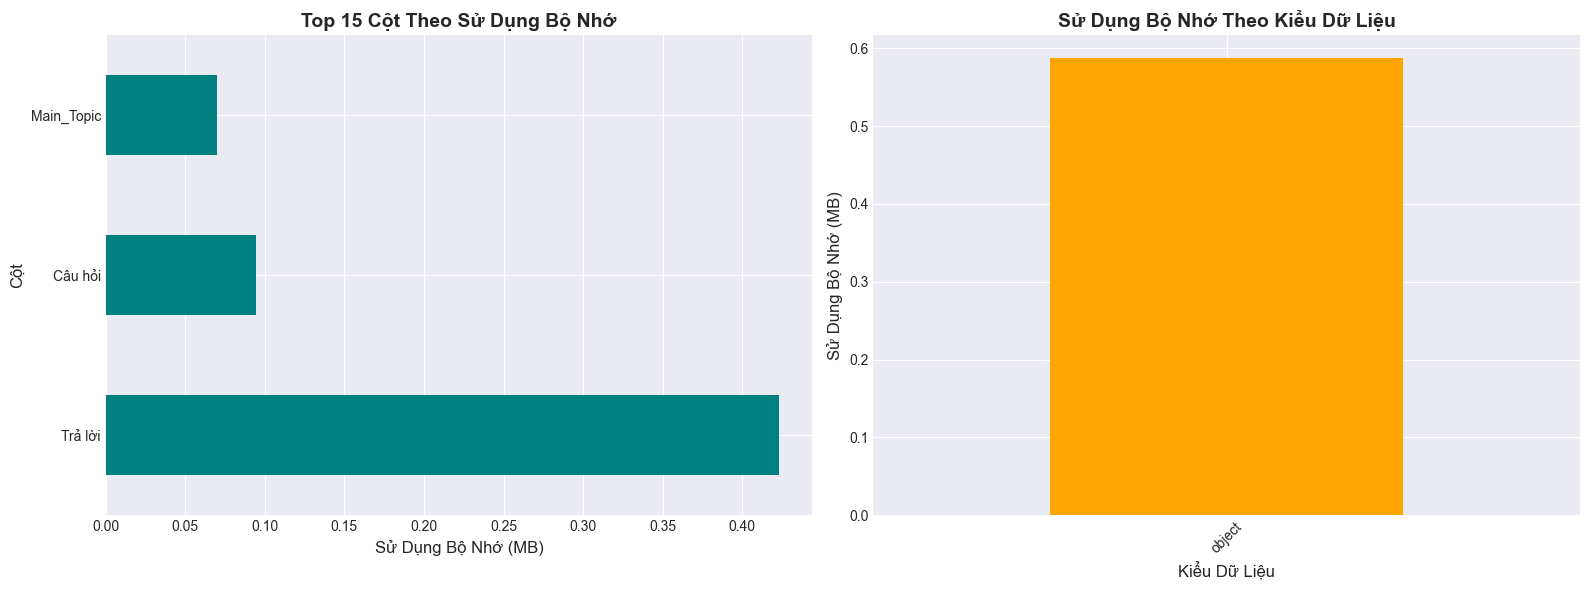

In [150]:
# Trực quan hóa sử dụng bộ nhớ
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bộ nhớ theo cột
memory_usage.head(15).plot(
    x='Column',
    y='Memory_Usage_MB',
    kind='barh',
    ax=axes[0],
    color='teal',
    legend=False
)
axes[0].set_title('Top 15 Cột Theo Sử Dụng Bộ Nhớ', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sử Dụng Bộ Nhớ (MB)', fontsize=12)
axes[0].set_ylabel('Cột', fontsize=12)

# Bộ nhớ theo kiểu dữ liệu
memory_by_type = memory_usage.groupby('Data_Type')['Memory_Usage_MB'].sum().sort_values(ascending=False)
memory_by_type.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Sử Dụng Bộ Nhớ Theo Kiểu Dữ Liệu', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Kiểu Dữ Liệu', fontsize=12)
axes[1].set_ylabel('Sử Dụng Bộ Nhớ (MB)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [151]:
# Đề xuất tối ưu hóa kiểu dữ liệu
print("\n" + "=" * 60)
print("ĐỀ XUẤT TỐI ƯU HÓA")
print("=" * 60)

for col in df.columns:
    if df[col].dtype == 'int64':
        if df[col].min() >= 0:
            if df[col].max() < 255:
                print(f"• {col}: int64 → uint8 (tiết kiệm bộ nhớ)")
            elif df[col].max() < 65535:
                print(f"• {col}: int64 → uint16 (tiết kiệm bộ nhớ)")
        else:
            if df[col].min() > -128 and df[col].max() < 127:
                print(f"• {col}: int64 → int8 (tiết kiệm bộ nhớ)")
            elif df[col].min() > -32768 and df[col].max() < 32767:
                print(f"• {col}: int64 → int16 (tiết kiệm bộ nhớ)")
    
    elif df[col].dtype == 'float64':
        if df[col].max() < 3.4e38:
            print(f"• {col}: float64 → float32 (tiết kiệm bộ nhớ)")
    
    elif df[col].dtype == 'object':
        if df[col].nunique() / len(df) < 0.5:
            print(f"• {col}: object → category (tiết kiệm bộ nhớ)")


ĐỀ XUẤT TỐI ƯU HÓA
• Main_Topic: object → category (tiết kiệm bộ nhớ)


## 7. Categorical Features Analysis

Phân tích biến phân loại sử dụng count plot, biểu đồ cột và bảng tần số. Xác định cardinality và các category hiếm.

In [152]:
# Tóm tắt đặc trưng phân loại
if len(categorical_cols) > 0:
    print("=" * 60)
    print("PHÂN TÍCH ĐẶC TRƯNG PHÂN LOẠI")
    print("=" * 60)
    
    for col in categorical_cols:
        print(f"\n{col}:")
        print(f"  Số giá trị duy nhất: {df[col].nunique()}")
        print(f"  Phổ biến nhất: {df[col].mode()[0] if len(df[col].mode()) > 0 else 'N/A'}")
        print(f"  Tần số phổ biến nhất: {df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0}")
        print(f"  Tỷ lệ cardinality: {df[col].nunique() / len(df):.4f}")
        
        if df[col].nunique() <= 10:
            print(f"  Số lượng giá trị:")
            print(df[col].value_counts().to_string())

PHÂN TÍCH ĐẶC TRƯNG PHÂN LOẠI

Main_Topic:
  Số giá trị duy nhất: 33
  Phổ biến nhất: TỔ CHỨC KHÁM BỆNH, CHỮA BỆNH BẢO HIỂM Y TẾ VÀ THANH TOÁN CHI PHÍ KHÁM BỆNH, CHỮA BỆNH BẢO HIỂM Y TẾ
  Tần số phổ biến nhất: 22
  Tỷ lệ cardinality: 0.1200

Câu hỏi:
  Số giá trị duy nhất: 273
  Phổ biến nhất: Bảo hiểm y tế là gì?
  Tần số phổ biến nhất: 2
  Tỷ lệ cardinality: 0.9927

Trả lời:
  Số giá trị duy nhất: 274
  Phổ biến nhất: 12 Tháng
  Tần số phổ biến nhất: 2
  Tỷ lệ cardinality: 0.9964



PHÂN TÍCH CARDINALITY


,Feature,Unique_Values,Cardinality_Ratio
2,Trả lời,274,0.996
1,Câu hỏi,273,0.993
0,Main_Topic,33,0.120


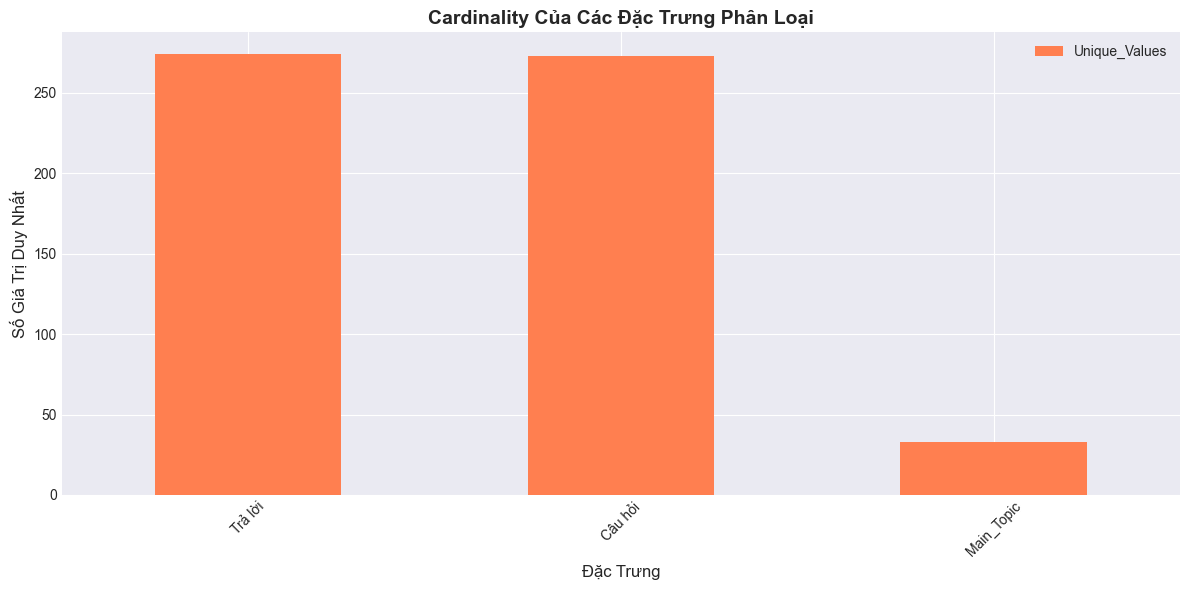

In [153]:
# Phân tích cardinality
if len(categorical_cols) > 0:
    cardinality = pd.DataFrame({
        'Feature': categorical_cols,
        'Unique_Values': [df[col].nunique() for col in categorical_cols],
        'Cardinality_Ratio': [df[col].nunique() / len(df) for col in categorical_cols]
    }).sort_values('Unique_Values', ascending=False)
    
    print("\n" + "=" * 60)
    print("PHÂN TÍCH CARDINALITY")
    print("=" * 60)
    display(cardinality)
    
    # Trực quan hóa cardinality
    fig, ax = plt.subplots(figsize=(12, 6))
    cardinality.plot(x='Feature', y='Unique_Values', kind='bar', ax=ax, color='coral')
    ax.set_title('Cardinality Của Các Đặc Trưng Phân Loại', fontsize=14, fontweight='bold')
    ax.set_xlabel('Đặc Trưng', fontsize=12)
    ax.set_ylabel('Số Giá Trị Duy Nhất', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

In [154]:
# Count plot cho đặc trưng phân loại (cardinality thấp)
if len(categorical_cols) > 0:
    low_card_cols = [col for col in categorical_cols if df[col].nunique() <= 20]
    
    if len(low_card_cols) > 0:
        n_cols = 2
        n_rows = (len(low_card_cols) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
        axes = axes.flatten() if n_rows > 1 else [axes]
        
        for idx, col in enumerate(low_card_cols):
            value_counts = df[col].value_counts()
            axes[idx].bar(range(len(value_counts)), value_counts.values, color='steelblue', edgecolor='black')
            axes[idx].set_xticks(range(len(value_counts)))
            axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
            axes[idx].set_title(f'Phân Phối {col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(col, fontsize=10)
            axes[idx].set_ylabel('Số Lượng', fontsize=10)
            axes[idx].grid(True, alpha=0.3, axis='y')
        
        # Ẩn subplot thừa
        for idx in range(len(low_card_cols), len(axes)):
            axes[idx].axis('off')
        
        plt.tight_layout()
        plt.show()

In [155]:
# Phân tích category hiếm
if len(categorical_cols) > 0:
    print("\n" + "=" * 60)
    print("PHÂN TÍCH CATEGORY HIẾM (tần số < 1%)")
    print("=" * 60)
    
    for col in categorical_cols:
        if df[col].nunique() <= 50:
            value_counts = df[col].value_counts()
            rare_categories = value_counts[value_counts / len(df) < 0.01]
            
            if len(rare_categories) > 0:
                print(f"\n{col}: {len(rare_categories)} category hiếm")
                print(rare_categories.to_string())


PHÂN TÍCH CATEGORY HIẾM (tần số < 1%)

Main_Topic: 5 category hiếm
Main_Topic
THỦ TỤC HÀNH CHÍNH LĨNH VỰC HỢP TÁC QUỐC TẾ                                     2
CẤP GIẤY CHỨNG NHẬN ĐỦ ĐIỀU KIỆN KINH DOANH PHẠM VI BẢO QUẢN DƯỢC LIỆU (GSP)    2
CẤP PHIẾU TIẾP NHẬN BẢN CÔNG BỐ DƯỢC LIỆU SẢN XUẤT THEO TIÊU CHUẨN GACP-WHO     2
CẤP GIẤY CHỨNG NHẬN BÀI THUỐC GIA TRUYỀN, PHƯƠNG PHÁP CHỮA BỆNH GIA TRUYỀN      2
VỀ TIÊM CHỦNG                                                                   1


## 8. Text's Length Analysis

In [156]:
# Tính toán độ dài văn bản
# 1. Xử lý giá trị thiếu (NaN) trong cột 'Câu hỏi' bằng một chuỗi rỗng
df['Câu hỏi'] = df['Câu hỏi'].fillna('')

# 2. Tạo cột mới đếm số từ cho 'Câu hỏi' và 'Trả lời'
# Chúng ta dùng .apply(lambda x: len(str(x).split())) để đếm số từ
df['cau_hoi_word_count'] = df['Câu hỏi'].apply(lambda x: len(str(x).split()))
df['tra_loi_word_count'] = df['Trả lời'].apply(lambda x: len(str(x).split()))

# 3. Hiển thị 5 hàng có câu hỏi ngắn nhất (không tính các hàng rỗng)
print("--- 5 hàng có câu hỏi ngắn nhất (không rỗng) ---")
display(df[df['cau_hoi_word_count'] > 0].sort_values('cau_hoi_word_count').head())

# 4. Hiển thị 5 hàng có câu trả lời ngắn nhất
print("\n--- 5 hàng có câu trả lời ngắn nhất ---")
display(df.sort_values('tra_loi_word_count').head())

# 5. Hiển thị thống kê mô tả
print("\n--- Thống kê độ dài (số từ) ---")
# Lọc ra các câu hỏi có từ để thống kê chính xác hơn
display(df[df['cau_hoi_word_count'] > 0]['cau_hoi_word_count'].describe())
display(df['tra_loi_word_count'].describe())

--- 5 hàng có câu hỏi ngắn nhất (không rỗng) ---


,Main_Topic,Câu hỏi,Trả lời,cau_hoi_word_count,tra_loi_word_count
33,THẺ BẢO HIỂM Y TẾ,Thẻ BHYT là gì ?,Thẻ BHYT được cấp cho người tham gia BHYT và l...,5,39
0,NHỮNG VẤN ĐỀ CHUNG,Bảo hiểm y tế là gì?,Bảo hiểm y tế là hình thức bảo hiểm được áp dụ...,6,71
113,THỦ TỤC HÀNH CHÍNH LĨNH VỰC QUẢN LÝ THỰC PHẨM ...,Tài khoản nộp phí là gì?,Tên đơn vị hưởng: Cục An toàn thực phẩm Số TK:...,6,20
91,QUYỀN VÀ TRÁCH NHIỆM CỦA CÁC BÊN LIÊN QUAN ĐẾN...,Trách nhiệm của tổ chức BHYT?,Tổ chức BHYT có các trách nhiệm sau (Điều 41 L...,6,253
102,THỦ TỤC HÀNH CHÍNH LĨNH VỰC BẢO HIỂM Y TẾ,Hộ gia đình tham gia BHYT?,Hộ gia đình tham gia BHYT bao gồm toàn bộ ngườ...,6,21



--- 5 hàng có câu trả lời ngắn nhất ---


,Main_Topic,Câu hỏi,Trả lời,cau_hoi_word_count,tra_loi_word_count
253,"CẤP GIẤY PHÉP HÀNH NGHỀ KHÁM BỆNH, CHỮA BỆNH",Có bao nhiêu Điều kiện và trách nhiệm của cơ s...,6,24,1
262,CẤP PHIẾU TIẾP NHẬN BẢN CÔNG BỐ DƯỢC LIỆU SẢN ...,Thành phần hồ sơ cho thủ tục Cấp Phiếu tiếp n...,14,27,1
260,CẤP PHIẾU TIẾP NHẬN BẢN CÔNG BỐ DƯỢC LIỆU SẢN ...,Có bao nhiêu hình thức nộp thủ tục Cấp Phiếu t...,2,22,1
243,THỦ TỤC HÀNH CHÍNH LĨNH VỰC QUẢN LÝ THỰC PHẨM ...,Đối tượng thực hiện thủ tục hành chính Cấp giấ...,Thương nhân,36,2
247,"CẤP GIẤY PHÉP HÀNH NGHỀ KHÁM BỆNH, CHỮA BỆNH","Thời gian thực hành khám bệnh, chữa bệnh để cấ...",12 Tháng,24,2



--- Thống kê độ dài (số từ) ---


count   275.000
mean     19.571
std       7.338
min       5.000
25%      14.000
50%      21.000
75%      23.000
max      45.000
Name: cau_hoi_word_count, dtype: float64

count   275.000
mean    101.993
std      76.064
min       1.000
25%      44.500
50%      81.000
75%     147.000
max     370.000
Name: tra_loi_word_count, dtype: float64

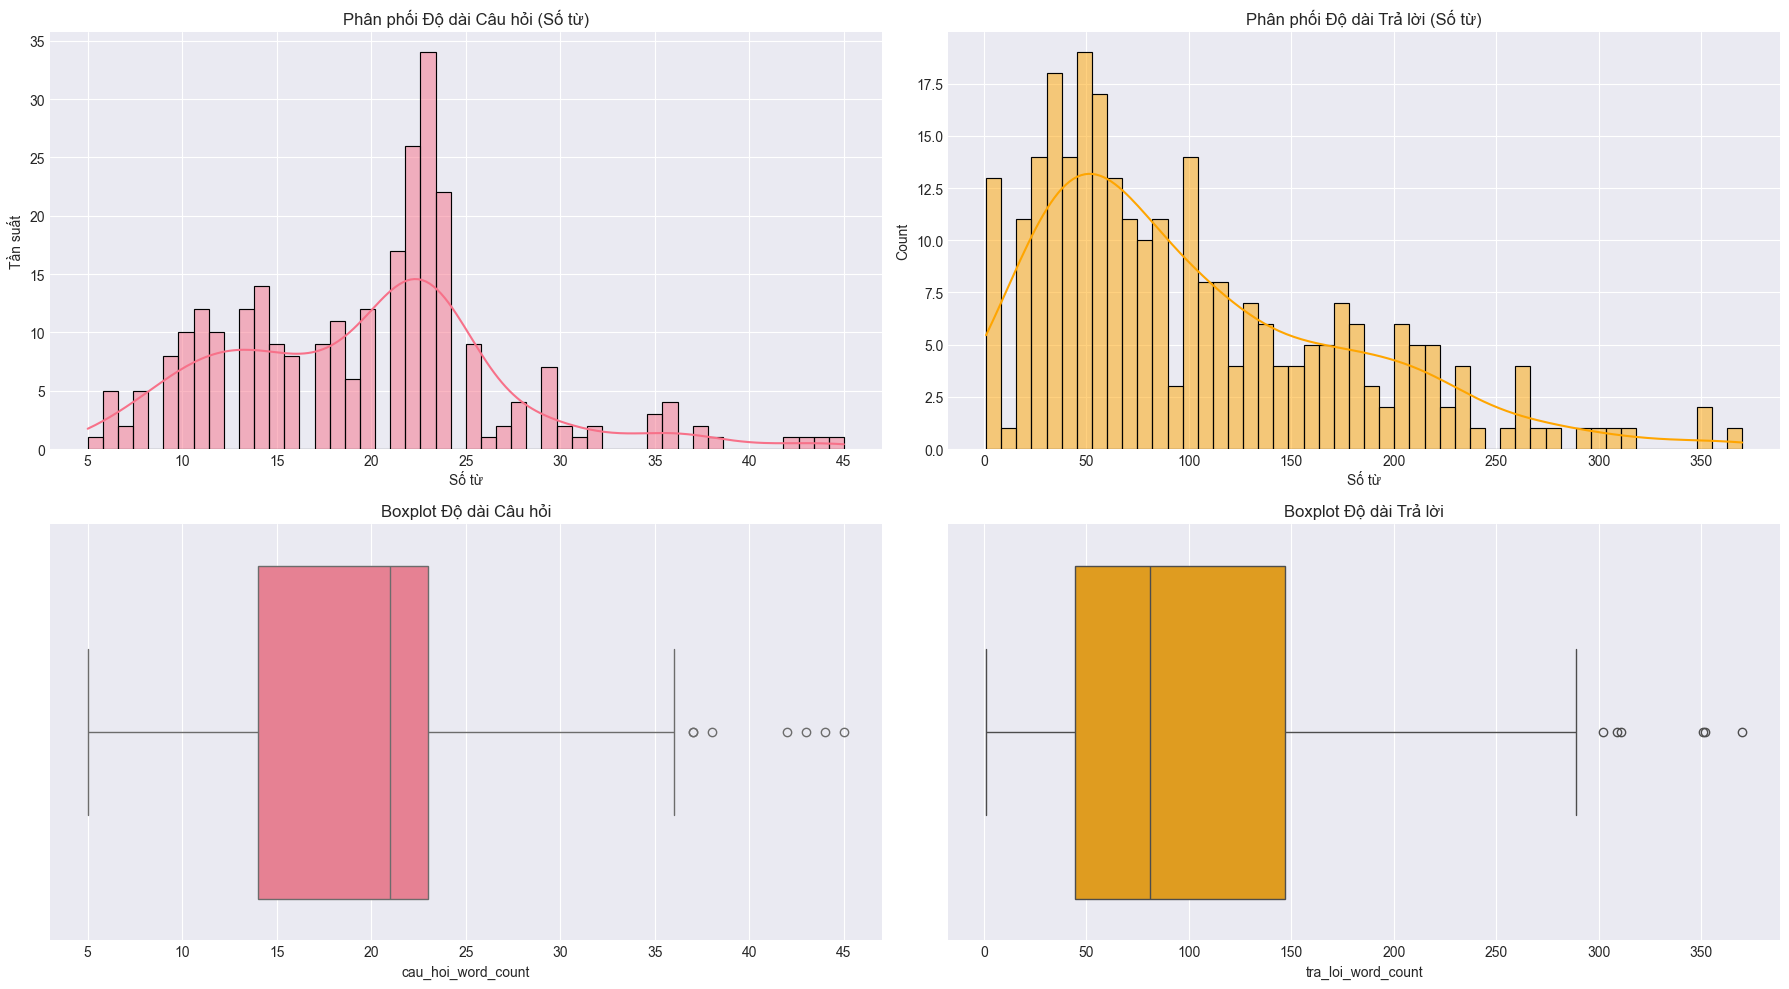

In [157]:
# Trực quan hóa độ dài văn bản
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style (đã có trong notebook của bạn)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# 1. Histogram cho Độ dài Câu hỏi
# Lọc ra các câu hỏi có độ dài > 0 (để loại bỏ 130 giá trị NaN đã điền)
sns.histplot(df[df['cau_hoi_word_count'] > 0]['cau_hoi_word_count'], bins=50, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Phân phối Độ dài Câu hỏi (Số từ)')
axes[0, 0].set_xlabel('Số từ')
axes[0, 0].set_ylabel('Tần suất')

# 2. Histogram cho Độ dài Trả lời
sns.histplot(df['tra_loi_word_count'], bins=50, ax=axes[0, 1], kde=True, color='orange')
axes[0, 1].set_title('Phân phối Độ dài Trả lời (Số từ)')
axes[0, 1].set_xlabel('Số từ')

# 3. Box plot cho Độ dài Câu hỏi
sns.boxplot(x=df[df['cau_hoi_word_count'] > 0]['cau_hoi_word_count'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot Độ dài Câu hỏi')

# 4. Box plot cho Độ dài Trả lời
sns.boxplot(x=df['tra_loi_word_count'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Boxplot Độ dài Trả lời')

plt.tight_layout()
plt.show()

## 9. Word Clouds

In [158]:
# Cài đặt WordCloud và chuẩn bị Stopwords
# Chạy cell này nếu bạn chưa cài đặt thư viện wordcloud
!pip install wordcloud

from wordcloud import WordCloud

# Danh sách stopwords tiếng Việt cơ bản (bạn có thể tìm và bổ sung thêm)
vietnamese_stopwords = [
    'là', 'của', 'và', 'các', 'có', 'cho', 'theo', 'để', 'được', 'khi', 'không', 
    'thì', 'tôi', 'từ', 'trong', 'với', 'về', 'một', 'như', 'những', 'này', 
    'ở', 'phải', 'ra', 'rằng', 'gì', 'đã', 'đó', 'tại', 'vào', 'hay', 'làm',
    'bị', 'cho', 'có', 'cùng', 'cũng', 'đến', 'để', 'đi', 'do', 'hơn', 'hết',
    'kcb', 'bhyt', 'y', 'tế', 'bảo', 'hiểm', 'hỏi', 'trả', 'lời', 'câu', 'việc',
    'quy', 'định', 'nào', 'trường', 'hợp', 'sau', 'khi', 'thủ', 'tục', 'xin'
]

print("✓ Đã tải WordCloud và danh sách stopwords.")

✓ Đã tải WordCloud và danh sách stopwords.


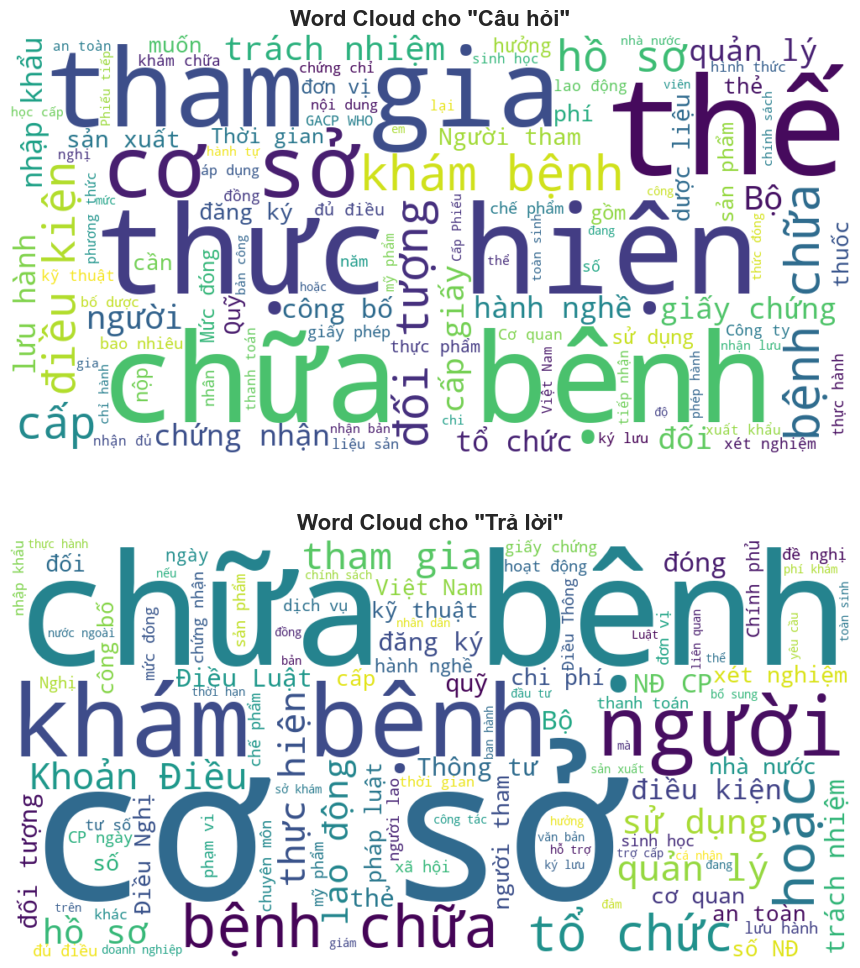

In [159]:
# Vẽ Word Clouds
# 1. Tạo một chuỗi văn bản lớn cho cột "Câu hỏi" (đã loại bỏ NaN)
text_cau_hoi = " ".join(str(cau) for cau in df['Câu hỏi'].dropna())

# 2. Tạo một chuỗi văn bản lớn cho cột "Trả lời"
text_tra_loi = " ".join(str(tra) for tra in df['Trả lời'].dropna())

# Tạo đối tượng WordCloud
# Chúng ta dùng font 'DejaVu Sans' có sẵn trong matplotlib để hỗ trợ tiếng Việt
wc_cau_hoi = WordCloud(stopwords=vietnamese_stopwords, 
                         background_color="white", 
                         max_words=100, 
                         width=1000, height=500,
                         font_path=None) # Nếu font lỗi, bạn cần tải file .ttf (ví dụ: 'Arial.ttf')

wc_tra_loi = WordCloud(stopwords=vietnamese_stopwords, 
                         background_color="white", 
                         max_words=100, 
                         width=1000, height=500,
                         font_path=None)

# Generate từ văn bản
if text_cau_hoi:
    wc_cau_hoi.generate(text_cau_hoi)
if text_tra_loi:
    wc_tra_loi.generate(text_tra_loi)

# 3. Vẽ biểu đồ
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

if text_cau_hoi:
    axes[0].imshow(wc_cau_hoi, interpolation='bilinear')
    axes[0].set_title('Word Cloud cho "Câu hỏi"', fontsize=16, fontweight='bold')
    axes[0].axis('off')
else:
    axes[0].text(0.5, 0.5, 'Không đủ dữ liệu "Câu hỏi" để tạo Word Cloud', horizontalalignment='center', verticalalignment='center')
    axes[0].axis('off')

if text_tra_loi:
    axes[1].imshow(wc_tra_loi, interpolation='bilinear')
    axes[1].set_title('Word Cloud cho "Trả lời"', fontsize=16, fontweight='bold')
    axes[1].axis('off')
else:
    axes[1].text(0.5, 0.5, 'Không có dữ liệu "Trả lời"', horizontalalignment='center', verticalalignment='center')
    axes[1].axis('off')
    
plt.show()

## 10. n-grams Analysis

In [160]:
# Cell: Phân tích N-grams

from sklearn.feature_extraction.text import CountVectorizer

# (Giả sử vietnamese_stopwords đã được định nghĩa ở cell trên)

def get_top_ngrams(corpus, ngram_range=(2, 2), top_k=20):
    """Hàm trích xuất N-grams phổ biến nhất từ một corpus văn bản"""
    try:
        vec = CountVectorizer(ngram_range=ngram_range, 
                              stop_words=vietnamese_stopwords).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:top_k]
    except ValueError:
        # Xảy ra khi corpus rỗng (ví dụ: 'Câu hỏi' sau khi bỏ NaN và stopwords)
        return []

# Lấy văn bản (chỉ lấy các hàng không rỗng)
corpus_cau_hoi = df[df['cau_hoi_word_count'] > 0]['Câu hỏi']
corpus_tra_loi = df[df['tra_loi_word_count'] > 0]['Trả lời']

# 1. Phân tích Bi-grams (cụm 2 từ)
print("--- Top 20 Bi-grams (Cụm 2 từ) trong 'Trả lời' ---")
top_bigrams_tl = get_top_ngrams(corpus_tra_loi, ngram_range=(2, 2), top_k=20)
df_bigrams_tl = pd.DataFrame(top_bigrams_tl, columns=['Bi-gram', 'Tần suất'])
display(df_bigrams_tl)
print("\n")

# 2. Phân tích Tri-grams (cụm 3 từ)
print("--- Top 20 Tri-grams (Cụm 3 từ) trong 'Trả lời' ---")
top_trigrams_tl = get_top_ngrams(corpus_tra_loi, ngram_range=(3, 3), top_k=20)
df_trigrams_tl = pd.DataFrame(top_trigrams_tl, columns=['Tri-gram', 'Tần suất'])
display(df_trigrams_tl)

--- Top 20 Bi-grams (Cụm 2 từ) trong 'Trả lời' ---


,Bi-gram,Tần suất
0,cơ sở,193
1,chữa bệnh,192
2,khám bệnh,170
3,bệnh chữa,167
4,tổ chức,119
5,tham gia,114
6,khoản điều,110
7,thực hiện,105
8,quản lý,104
9,hồ sơ,96




--- Top 20 Tri-grams (Cụm 3 từ) trong 'Trả lời' ---


,Tri-gram,Tần suất
0,khám bệnh chữa,167
1,bệnh chữa bệnh,167
2,người tham gia,60
3,2016 nđ cp,45
4,giấy chứng nhận,43
5,thông tư số,42
6,người lao động,40
7,nđ cp ngày,40
8,đủ điều kiện,39
9,an toàn sinh,35


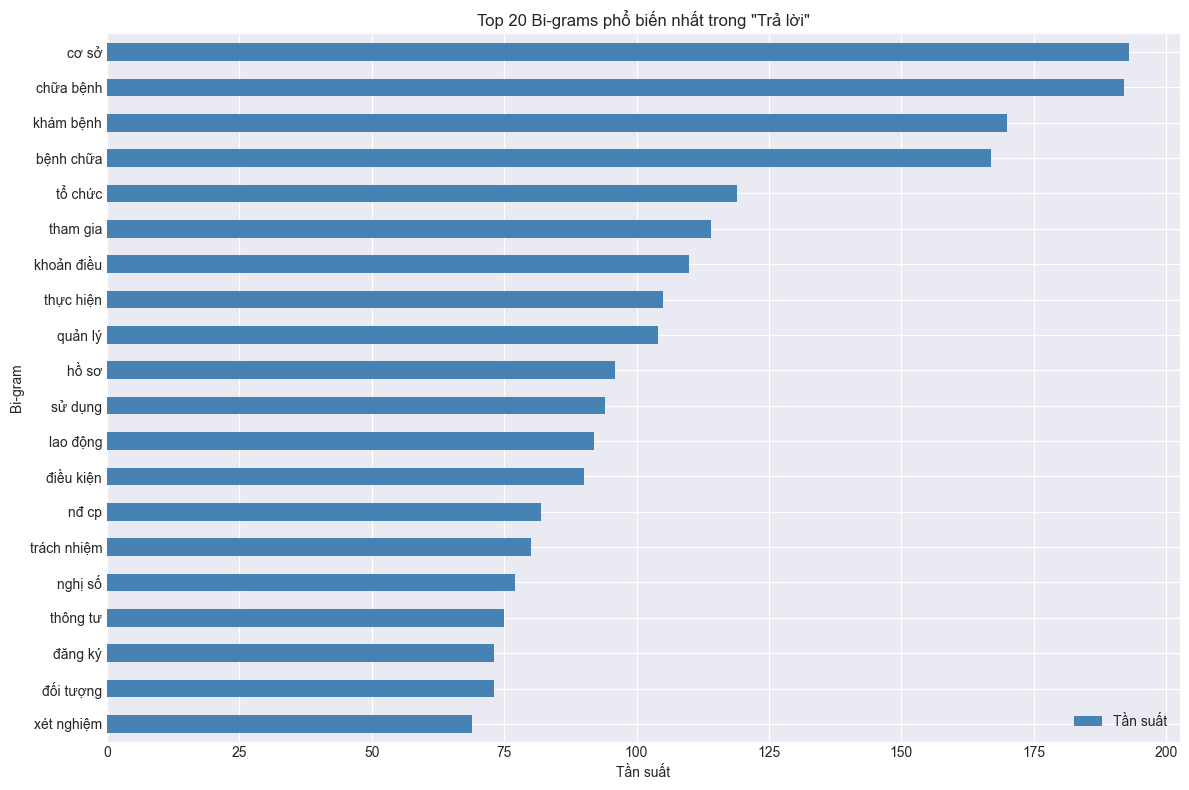

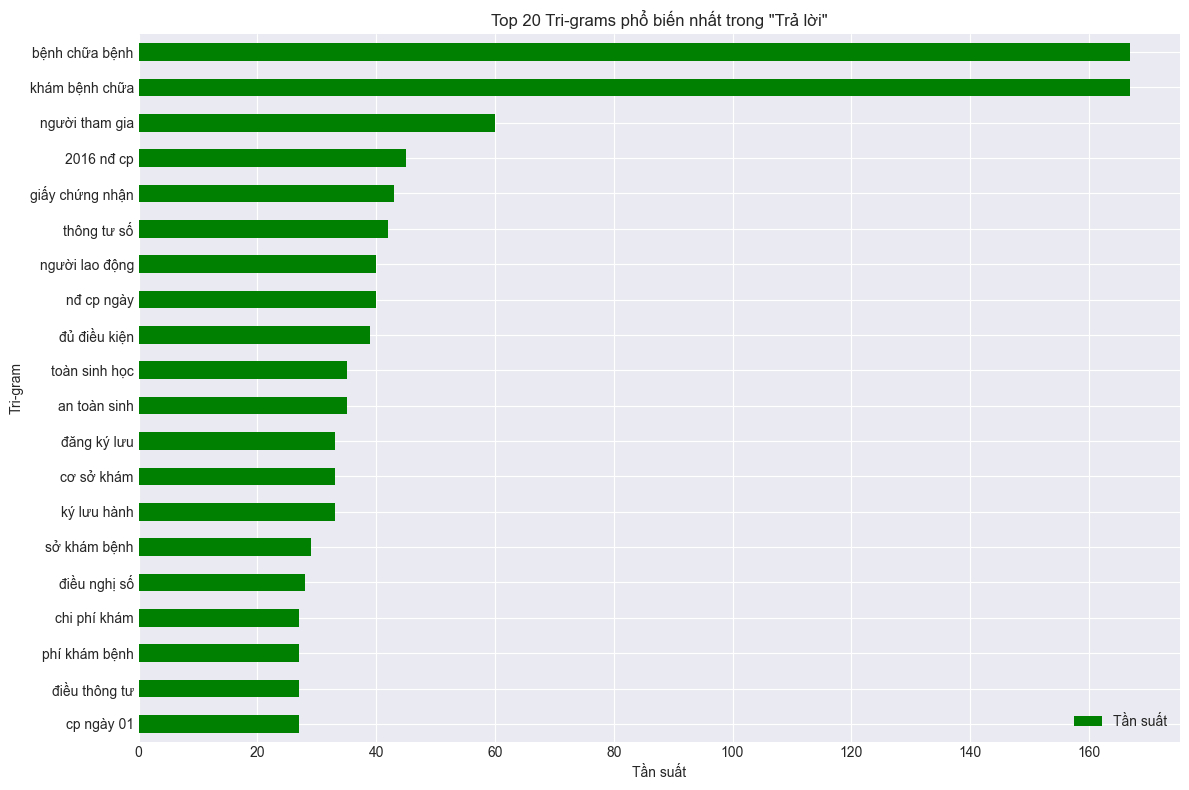

In [161]:
# Cell: Trực quan hóa N-grams

if not df_bigrams_tl.empty:
    fig, ax = plt.subplots(figsize=(12, 8))
    df_bigrams_tl.sort_values('Tần suất', ascending=True).plot.barh(x='Bi-gram', y='Tần suất', ax=ax, color='steelblue')
    ax.set_title('Top 20 Bi-grams phổ biến nhất trong "Trả lời"')
    ax.set_xlabel('Tần suất')
    ax.set_ylabel('Bi-gram')
    plt.tight_layout()
    plt.show()
else:
    print("Không có bi-grams nào để hiển thị.")

if not df_trigrams_tl.empty:
    fig, ax = plt.subplots(figsize=(12, 8))
    df_trigrams_tl.sort_values('Tần suất', ascending=True).plot.barh(x='Tri-gram', y='Tần suất', ax=ax, color='green')
    ax.set_title('Top 20 Tri-grams phổ biến nhất trong "Trả lời"')
    ax.set_xlabel('Tần suất')
    ax.set_ylabel('Tri-gram')
    plt.tight_layout()
    plt.show()
else:
    print("Không có tri-grams nào để hiển thị.")